# Independent Component Analysis

Using ICA to retrieve the original signals from three observations each of which contains a different mix of the original signals. There are three WAVE files.

In [18]:
import numpy as np
import wave

# Read the wave file
mix_1_wave = wave.open('ICA mix 1.wav','r')

Checking out the params of the WAVE file

In [19]:
mix_1_wave.getparams()

_wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=264515, comptype='NONE', compname='not compressed')

The file has only one channel (so it's mono sound). It has a frame rate of 44100, which means each second of sound is represented by 44100 integer. The file has a total of 264515 integers/frames, which means its length in seconds is--

In [20]:
264515/44100

5.998072562358277

Extract the frames of the wave file, which will be a part of the dataset we'll run ICA against.

In [21]:
# Extract Raw Audio from Wav File
signal_1_raw = mix_1_wave.readframes(-1)
signal_1 = np.fromstring(signal_1_raw, 'Int16')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


signal_1 is now a list of ints representing the sound contained in the first file.

In [22]:
'length: ', len(signal_1) , 'first 100 elements: ',signal_1[:100]

('length: ',
 264515,
 'first 100 elements: ',
 array([  879,  1268,  1460,  1756,  1943,  2216,  2407,  2668,  2866,
         3106,  3308,  3546,  3752,  3981,  4175,  4395,  4588,  4790,
         4966,  5146,  5292,  5436,  5550,  5643,  5717,  5759,  5790,
         5798,  5789,  5756,  5713,  5649,  5576,  5478,  5381,  5267,
         5146,  4999,  4856,  4682,  4502,  4308,  4097,  3875,  3637,
         3380,  3107,  2825,  2514,  2194,  1847,  1472,  1087,   671,
          227,  -219,  -691, -1176, -1666, -2167, -2669, -3179, -3668,
        -4170, -4643, -5116, -5559, -5985, -6380, -6765, -7105, -7422,
        -7706, -7955, -8163, -8339, -8470, -8557, -8600, -8618, -8585,
        -8524, -8425, -8298, -8129, -7947, -7720, -7475, -7205, -6916,
        -6606, -6266, -5922, -5556, -5165, -4774, -4353, -3922, -3476, -3021], dtype=int16))

Plotting this array as a line graph to get the wave form representation

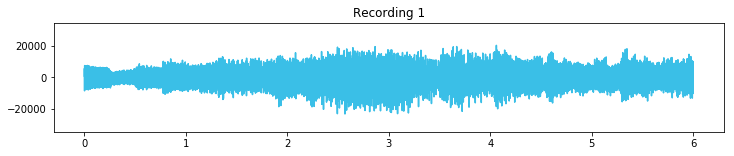

In [23]:
import matplotlib.pyplot as plt
% matplotlib inline

fs = mix_1_wave.getframerate()
timing = np.linspace(0, len(signal_1)/fs, num=len(signal_1))


plt.figure(figsize=(12,2))
plt.title('Recording 1')
plt.plot(timing,signal_1, c="#3ABFE7")
plt.ylim(-35000, 35000)
plt.show()

Now loading the other two WAVE files

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  if sys.path[0] == '':


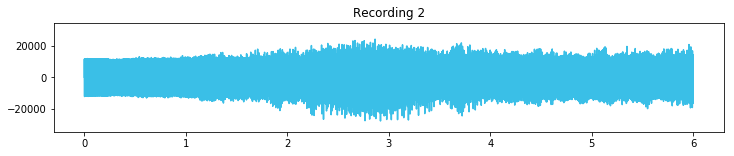

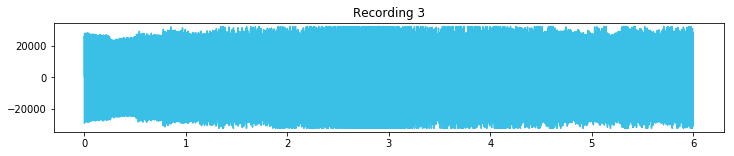

In [24]:
mix_2_wave = wave.open('ICA mix 2.wav','r')

#Extract Raw Audio from Wav File
signal_raw_2 = mix_2_wave.readframes(-1)
signal_2 = np.fromstring(signal_raw_2, 'Int16')


mix_3_wave = wave.open('ICA mix 3.wav','r')

#Extract Raw Audio from Wav File
signal_raw_3 = mix_3_wave.readframes(-1)
signal_3 = np.fromstring(signal_raw_3, 'Int16')


plt.figure(figsize=(12,2))
plt.title('Recording 2')
plt.plot(timing,signal_2, c="#3ABFE7")
plt.ylim(-35000, 35000)
plt.show()


plt.figure(figsize=(12,2))
plt.title('Recording 3')
plt.plot(timing,signal_3, c="#3ABFE7")
plt.ylim(-35000, 35000)
plt.show()


Zips the files together to create the dataset--
create dataset X by zipping signal_1, signal_2, and signal_3 into a single list

In [25]:
X = list(zip(signal_1, signal_2, signal_3))


X[:10]

[(879, 157, 879),
 (1268, 899, 2584),
 (1460, 1610, 4081),
 (1756, 2325, 5682),
 (1943, 3022, 7147),
 (2216, 3718, 8689),
 (2407, 4386, 10114),
 (2668, 5056, 11583),
 (2866, 5690, 12954),
 (3106, 6318, 14327)]

In [26]:
# Import FastICA
from sklearn.decomposition import FastICA

# Initialize FastICA with n_components=3
ica = FastICA(n_components=3)

# Run the FastICA algorithm on dataset X
ica_result = ica.fit_transform(X)

ica_result should now be the original signals

In [27]:
ica_result.shape

(264515, 3)

Splitting into separate signals to check them out

In [28]:
result_signal_1 = ica_result[:,0]
result_signal_2 = ica_result[:,1]
result_signal_3 = ica_result[:,2]

Plot them to see how the wave forms look

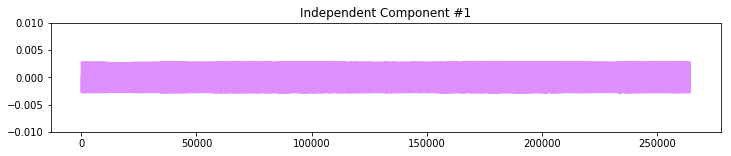

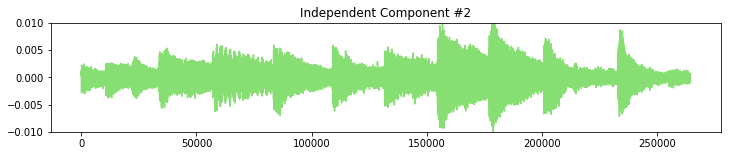

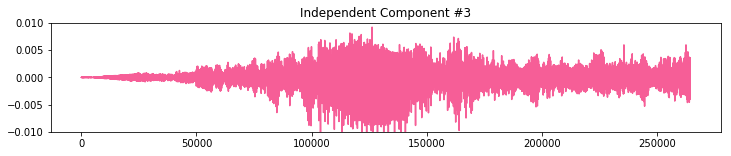

In [29]:
# Plot Independent Component #1
plt.figure(figsize=(12,2))
plt.title('Independent Component #1')
plt.plot(result_signal_1, c="#df8efd")
plt.ylim(-0.010, 0.010)
plt.show()

# Plot Independent Component #2
plt.figure(figsize=(12,2))
plt.title('Independent Component #2')
plt.plot(result_signal_2, c="#87de72")
plt.ylim(-0.010, 0.010)
plt.show()

# Plot Independent Component #3
plt.figure(figsize=(12,2))
plt.title('Independent Component #3')
plt.plot(result_signal_3, c="#f65e97")
plt.ylim(-0.010, 0.010)
plt.show()



Save as wave files and verify the source. Make sure to do the following prior to saving:
* convert them to integer (so we can save as PCM 16-bit Wave files), otherwise only some media players would be able to play them and others won't
* Map the values to the appropriate range for int16 audio. That range is between -32768 and +32767. Basic mapping can be done by multiplying by 32767.
* To increase volume multiply by a value like 100

In [30]:
from scipy.io import wavfile

# Convert to int, map the appropriate range, and increase the volume a little bit
result_signal_1_int = np.int16(result_signal_1*32767*100)
result_signal_2_int = np.int16(result_signal_2*32767*100)
result_signal_3_int = np.int16(result_signal_3*32767*100)


# Write wave files
wavfile.write("result_signal_1.wav", fs, result_signal_1_int)
wavfile.write("result_signal_2.wav", fs, result_signal_2_int)
wavfile.write("result_signal_3.wav", fs, result_signal_3_int)

Resulting files are:
* [result_signal_1.wav](result_signal_1.wav)
* [result_signal_2.wav](result_signal_2.wav)
* [result_signal_3.wav](result_signal_3.wav)


Music:
* Piano - The Carnival of the Animals - XIII. The Swan (Solo piano version). Performer: Markus Staab
* Cello - Cello Suite no. 3 in C, BWV 1009 - I. Prelude. Performer: European Archive
